In [9]:
from google.colab import drive
drive.mount('/content/gdrive')
base_path = "/content/gdrive/My Drive/"
path = base_path + "POOS Projekat/images/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 39.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [4]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

# Image read and Grayscale

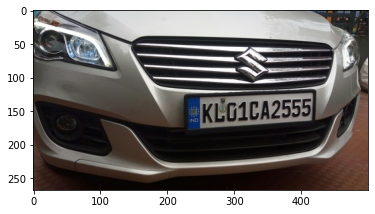

In [48]:
img = cv2.imread(path + 'Cars0.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

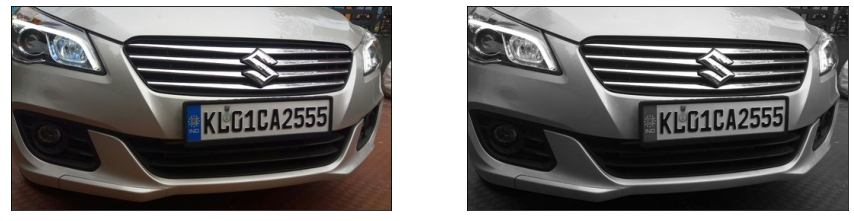

In [49]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plot_images(img, gray)

#Noise reduction

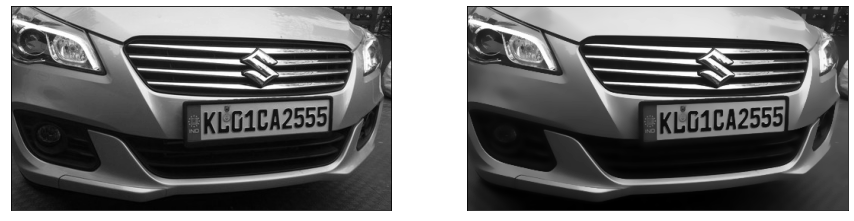

In [50]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
plot_images(gray, bfilter)

#Edge detection

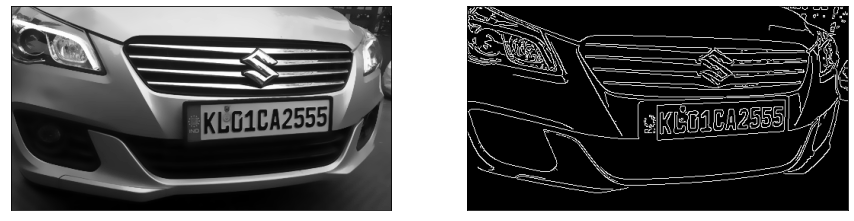

In [51]:
edged = cv2.Canny(bfilter, 30, 200) 
plot_images(bfilter, edged)

# Find Contours

In [52]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
image_copy = img.copy()
_ = cv2.drawContours(image_copy, contours, -1, (255,0,255),2)

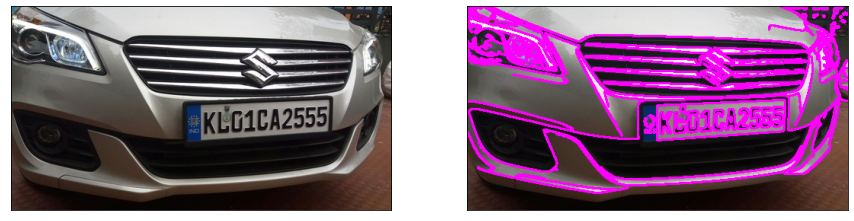

In [53]:
plot_images(img, image_copy)

In [54]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [56]:
image_copy = img.copy()
_ = cv2.drawContours(image_copy, contours, -1, (255,0,255),2)

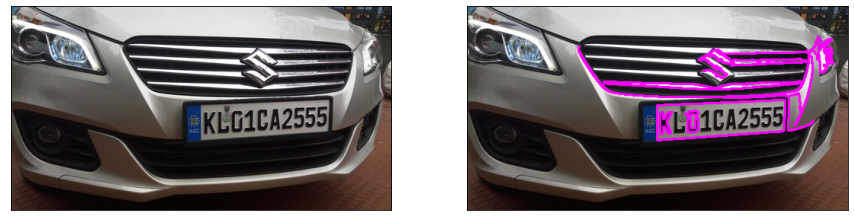

In [57]:
plot_images(img, image_copy)

In [58]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [59]:
location

array([[[417, 123]],

       [[249, 130]],

       [[249, 175]],

       [[415, 164]]], dtype=int32)

# Apply Mask

In [60]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

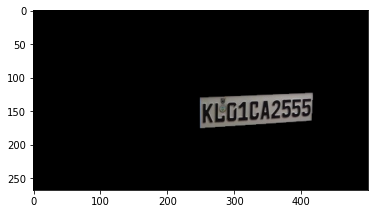

In [61]:
plt.imshow(new_image)

In [62]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

In [63]:
cv2.imwrite(path + "plate-cars0.png", cropped_image)

True

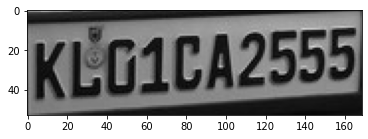

In [64]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# EasyOCR

In [65]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 0], [169, 0], [169, 53], [0, 53]], 'KL01CA2555', 0.48523875349936557)]

In [66]:
text = result[0][-2]

In [67]:
text

'KL01CA2555'

# Render Results

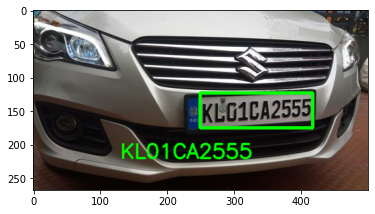

In [68]:
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[1][0][1], approx[1][0][1]+90), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(res)

In [69]:
cv2.imwrite(path + "labeled-cars0.png", cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

True

__________________________________________________________